# Data analyse

In [1]:
#dataframe tratment
import os
import pandas as pd
import numpy as np

#representation importation
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Machin learning importation
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_validate, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data = pd.read_csv("Data_analyse.csv")

In [4]:
data.head()

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      14                      5   
2            Positive                      14                      7   
3            Positive                       2                      1   
4            Positive                       3                      1   

   Survival Months Status  
0               60  Alive  
1               62  Alive  
2               75  Alive  
3               84  Alive  
4               50  Alive

In [5]:
data['A Stage'].value_counts()

Regional    3932
Distant       92
Name: A Stage, dtype: int64

In [6]:
data['differentiate'].value_counts()

Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: differentiate, dtype: int64

In [7]:
data['Race'].value_counts()

White    3413
Other     320
Black     291
Name: Race, dtype: int64

In [8]:
data['Survival Months'].value_counts()

69     81
63     73
56     73
102    73
98     72
       ..
7       5
3       4
11      4
2       3
1       1
Name: Survival Months, Length: 107, dtype: int64

In [9]:
data['Status'].value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

In [10]:
data['Grade'].value_counts()

2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: Grade, dtype: int64

In [11]:
data['Estrogen Status'].value_counts()

Positive    3755
Negative     269
Name: Estrogen Status, dtype: int64

In [12]:
data['Progesterone Status'].value_counts()

Positive    3326
Negative     698
Name: Progesterone Status, dtype: int64

In [13]:
data.head()


Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      14                      5   
2            Positive                      14                      7   
3            Positive                       2                      1   
4            Positive                       3                      1   

   Survival Months Status  
0               60  Alive  
1               62  Alive  
2               75  Alive  
3               84  Alive  
4               50  Alive

<AxesSubplot:>

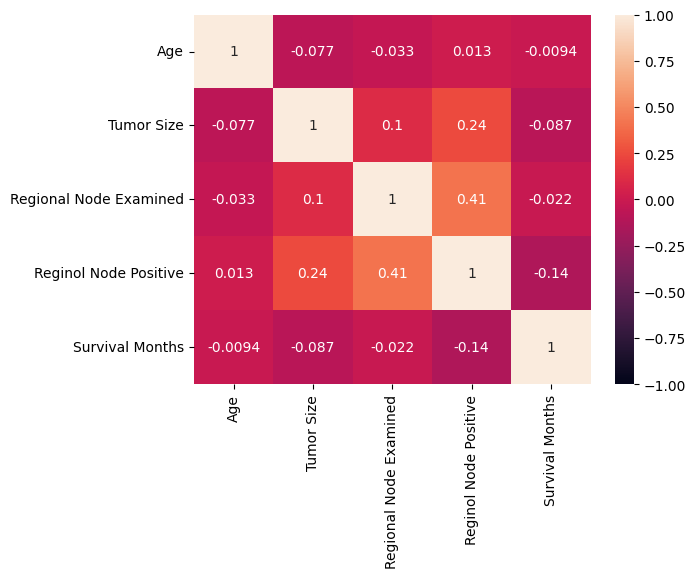

In [14]:
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)

In [15]:
data['Race'].value_counts()

White    3413
Other     320
Black     291
Name: Race, dtype: int64

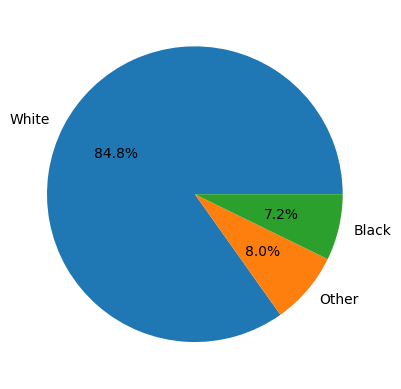

In [16]:
plt.pie(data['Race'].value_counts(), labels=data['Race'].value_counts().index, autopct='%1.1f%%');

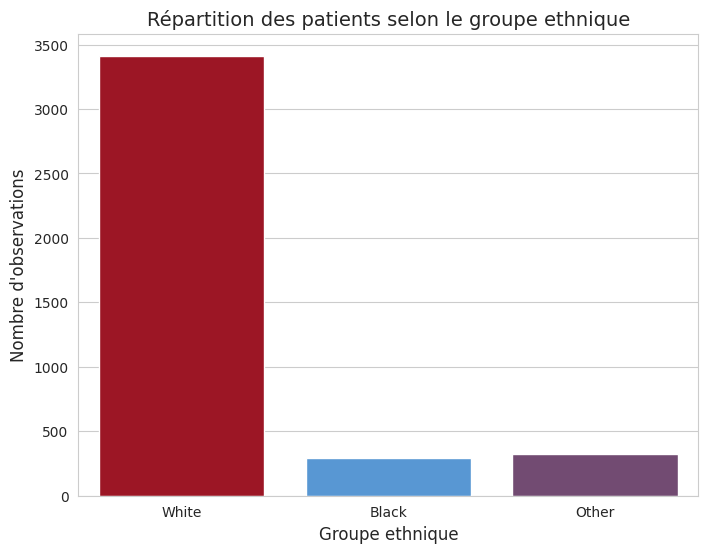

In [17]:
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Race'], palette=['#B20013', '#4497E7', '#784578'])

# Add labels and title
plt.title("Répartition des patients selon le groupe ethnique", fontsize=14)
plt.xlabel("Groupe ethnique", fontsize=12)
plt.ylabel("Nombre d'observations", fontsize=12)

# Print graph
plt.show()

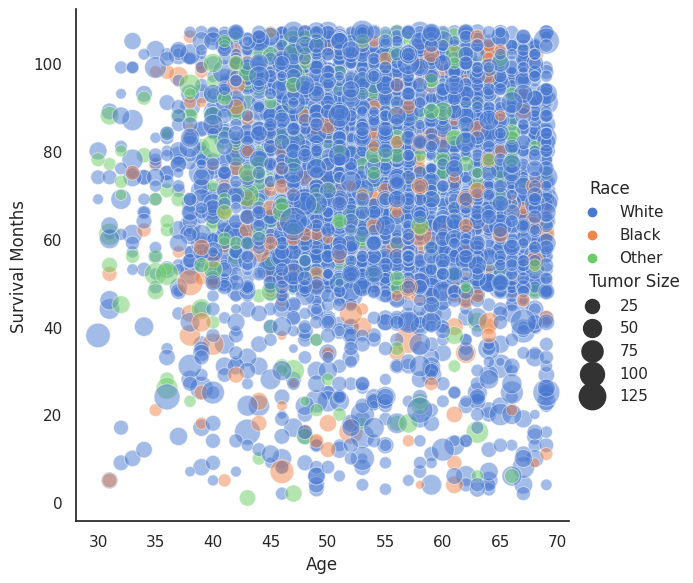

In [18]:
sns.set_theme(style="white")


# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Age", y="Survival Months", hue="Race", size="Tumor Size",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

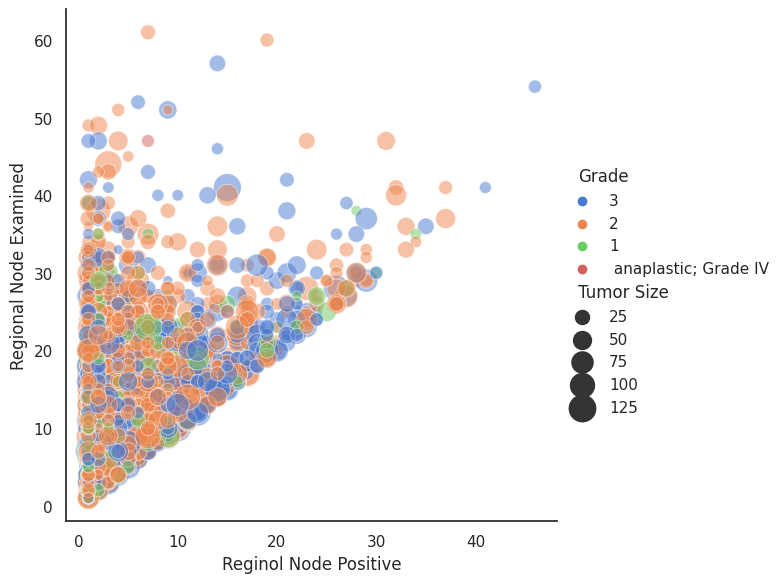

In [19]:
sns.set_theme(style="white")



sns.relplot(x="Reginol Node Positive", y="Regional Node Examined", hue="Grade", size="Tumor Size",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

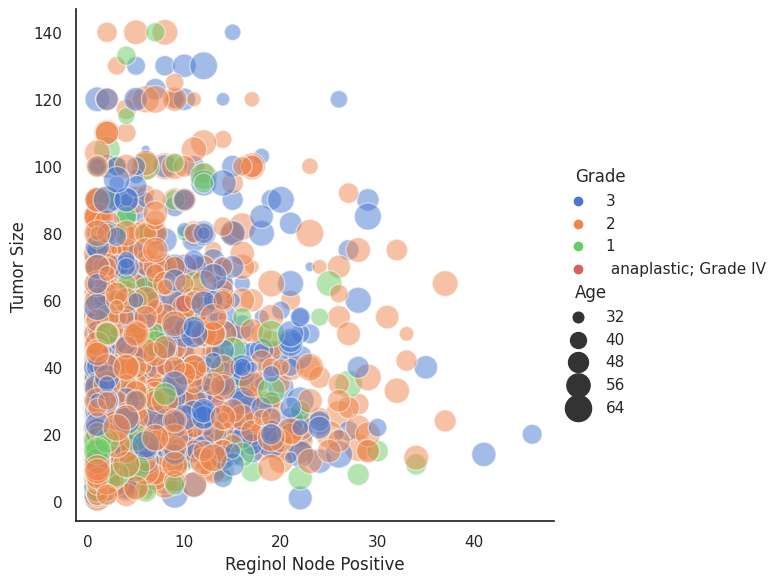

In [20]:
sns.set_theme(style="white")


# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Reginol Node Positive", y="Tumor Size", hue="Grade", size="Age",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

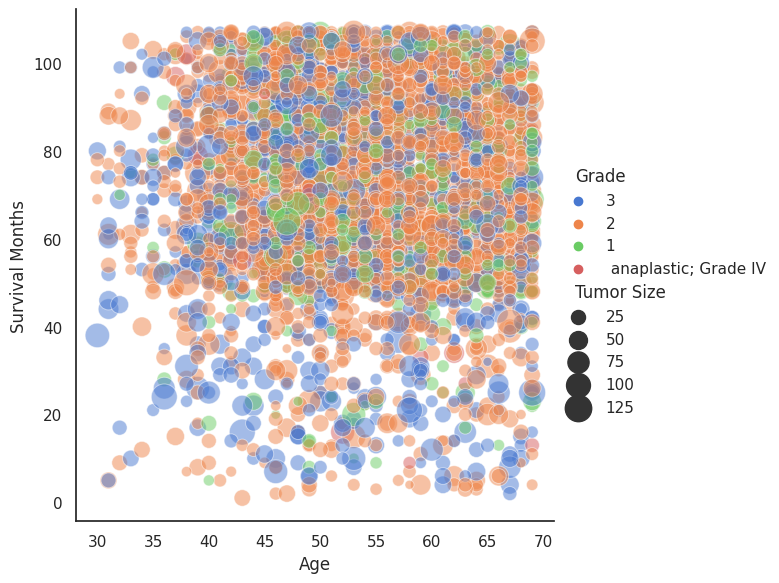

In [21]:
sns.set_theme(style="white")


# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Age", y="Survival Months", hue="Grade", size="Tumor Size",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

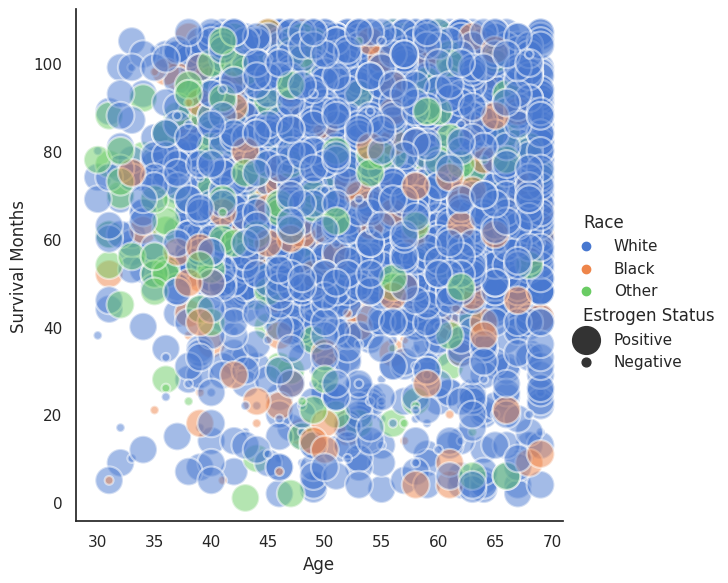

In [22]:
sns.set_theme(style="white")


# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Age", y="Survival Months", hue="Race", size="Estrogen Status",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

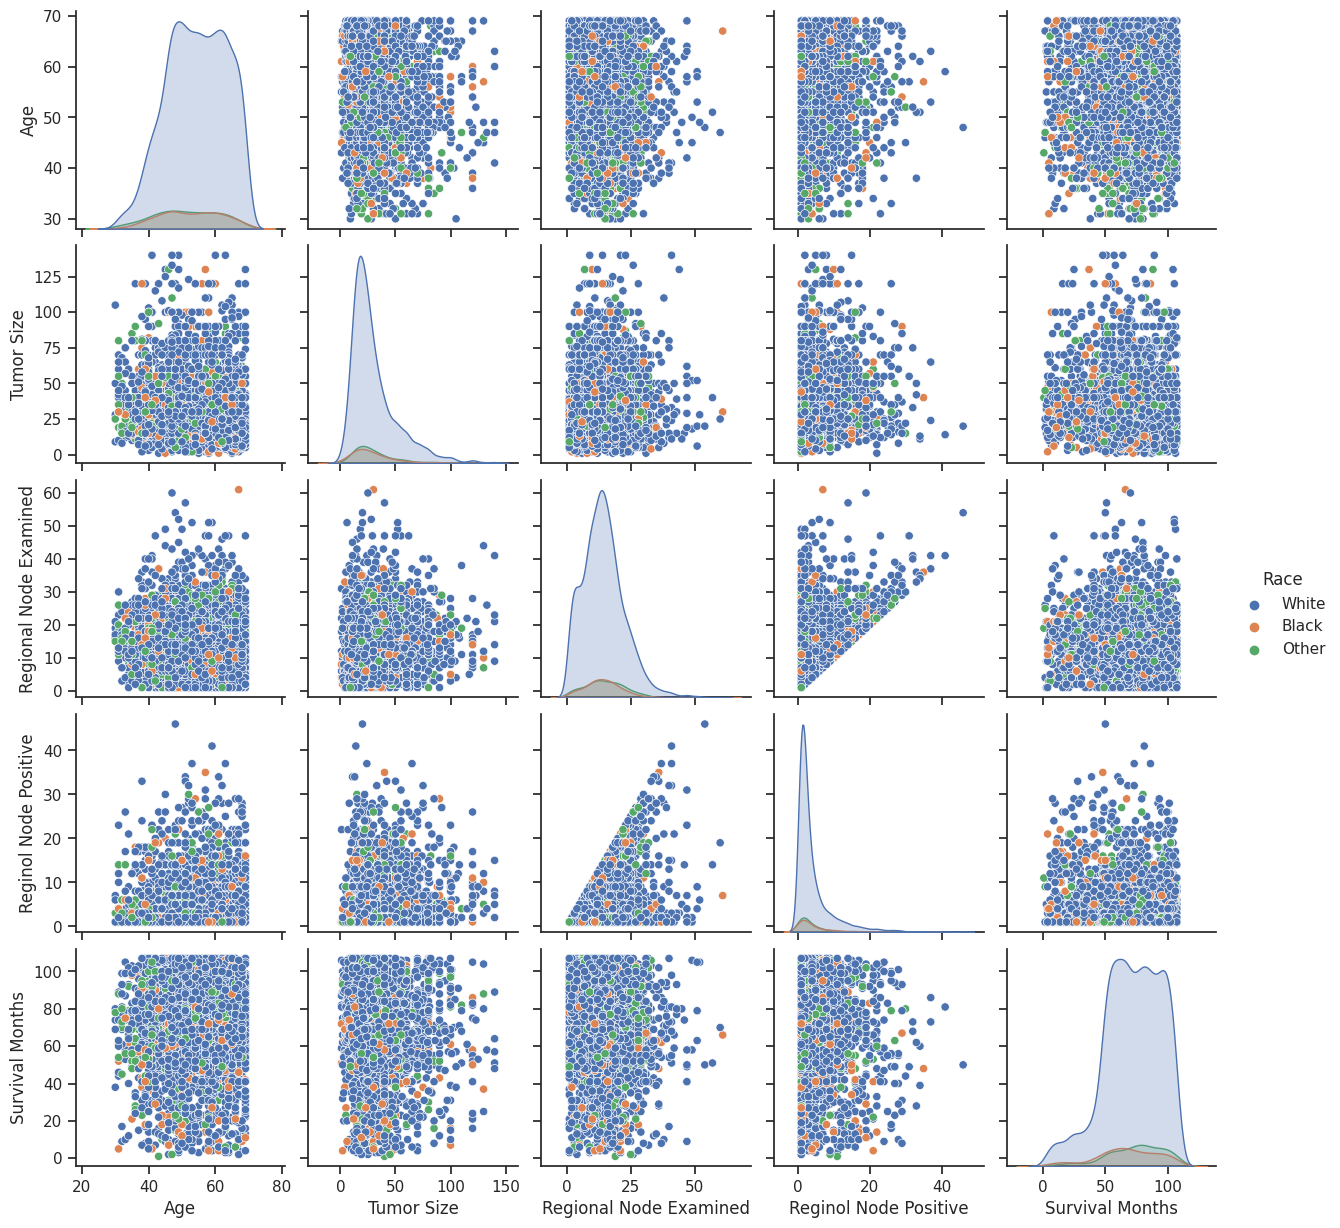

In [23]:
sns.set_theme(style="ticks")


sns.pairplot(data, hue="Race")

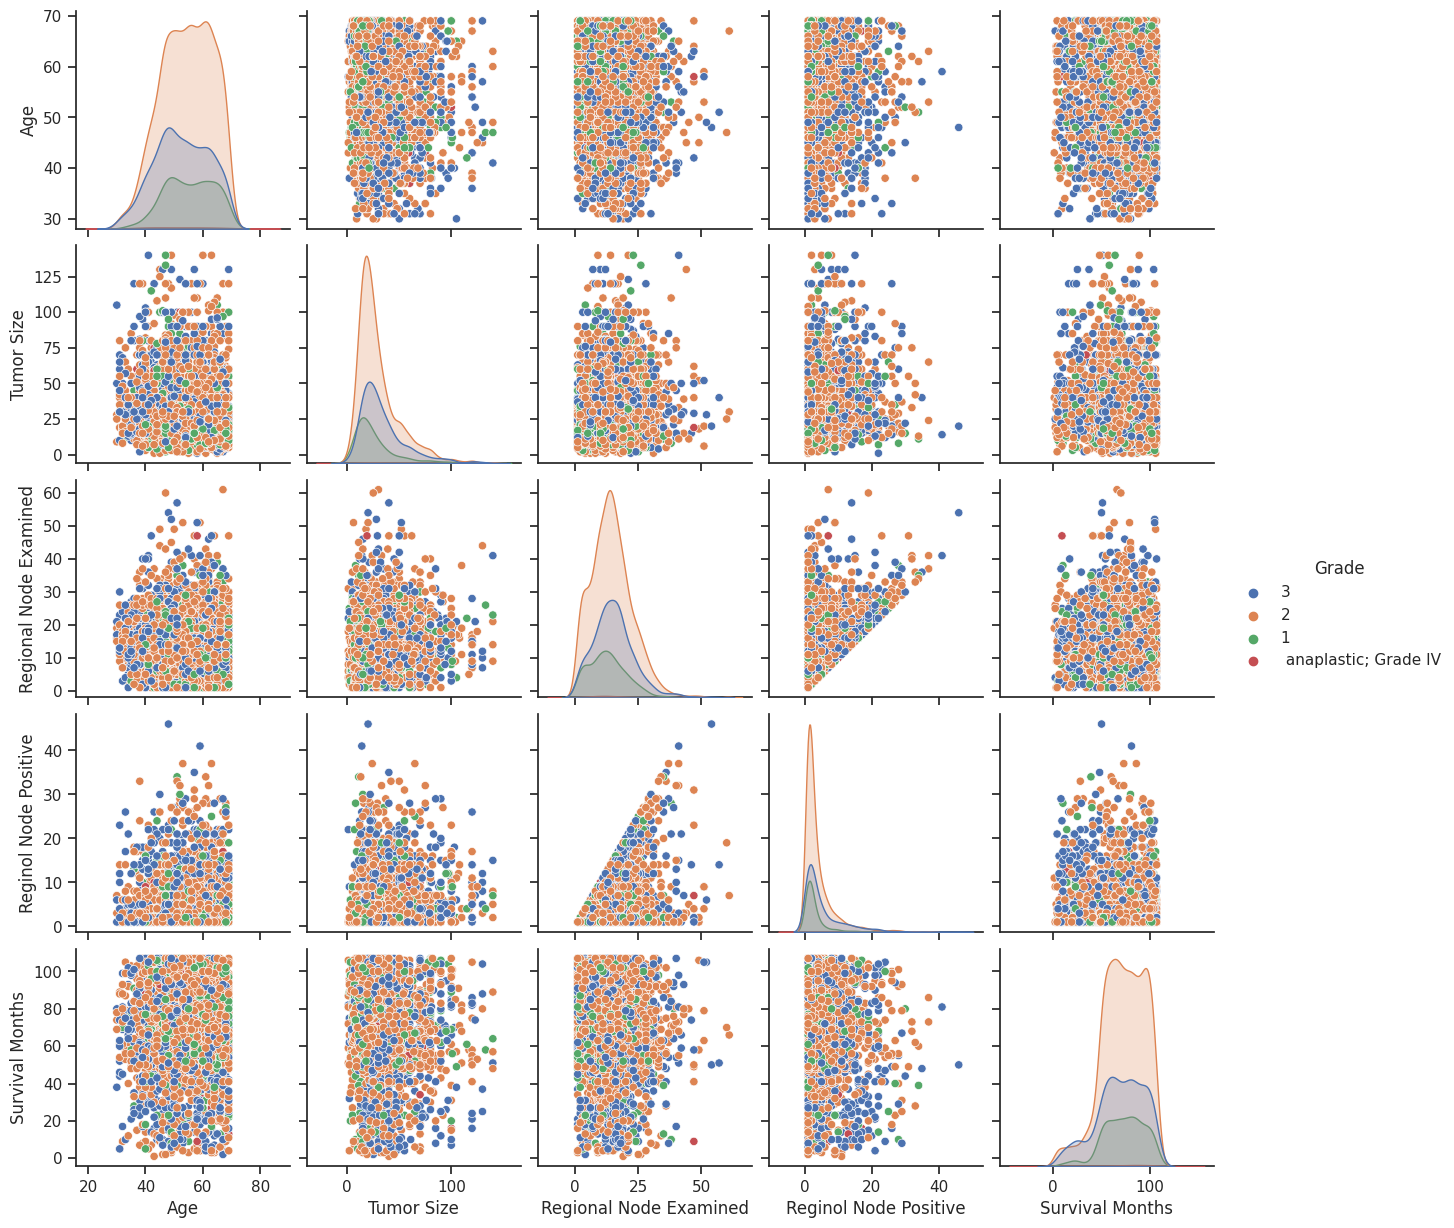

In [24]:
sns.set_theme(style="ticks")


sns.pairplot(data, hue="Grade")

In [25]:
data.head()

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      14                      5   
2            Positive                      14                      7   
3            Positive                       2                      1   
4            Positive                       3                      1   

   Survival Months Status  
0               60  Alive  
1               62  Alive  
2               75  Alive  
3               84  Alive  
4               50  Alive

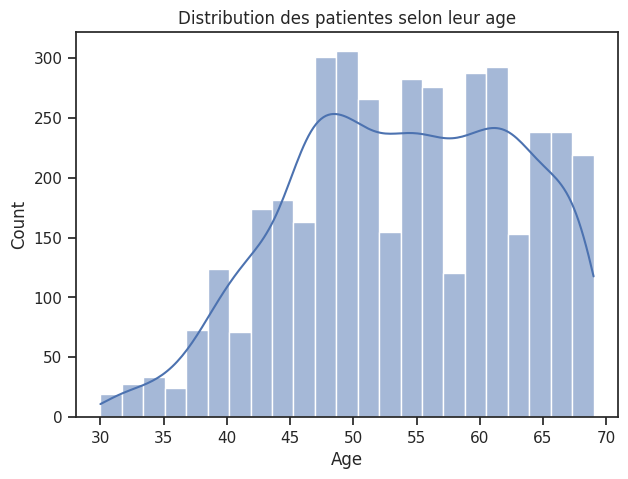

In [26]:
plt.figure(figsize=(7,5))
sns.histplot(x=data['Age'], kde=True)
plt.title("Distribution des patientes selon leur age")
plt.show();

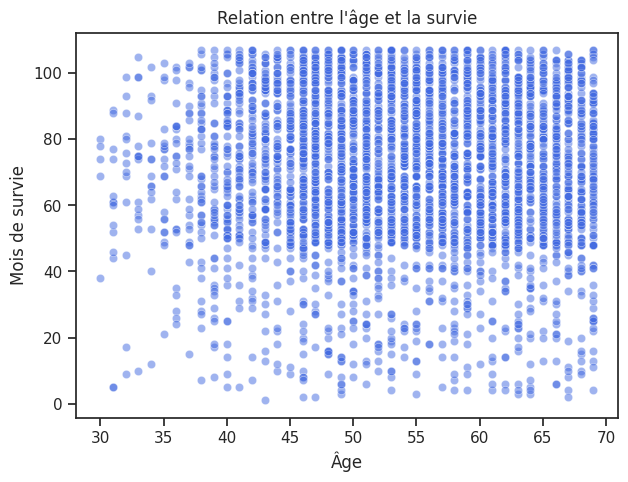

In [27]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=data['Age'], y=data['Survival Months'], alpha=0.5, color='royalblue')
plt.title("Relation entre l'âge et la survie")
plt.xlabel("Âge")
plt.ylabel("Mois de survie")
plt.show()

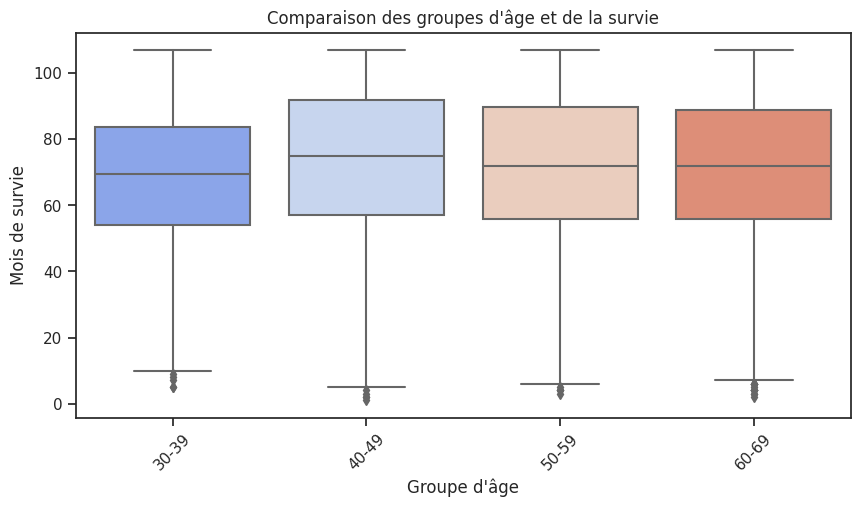

In [28]:
plt.figure(figsize=(10, 5))
age_bins = pd.cut(data['Age'], bins=range(30, 71, 10), right=False, 
                    labels=[f"{i}-{i+9}" for i in range(30, 70, 10)])
sns.boxplot(x=age_bins, y=data['Survival Months'], palette="coolwarm")
plt.title("Comparaison des groupes d'âge et de la survie")
plt.xlabel("Groupe d'âge")
plt.ylabel("Mois de survie")
plt.xticks(rotation=45)  
plt.show()

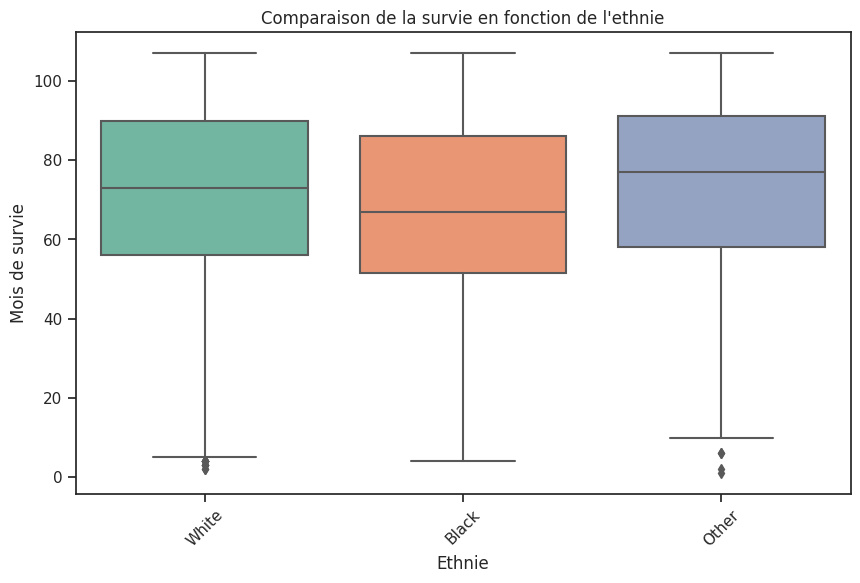

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Race", y="Survival Months", data=data, palette="Set2")
plt.title("Comparaison de la survie en fonction de l'ethnie")
plt.xlabel("Ethnie")
plt.ylabel("Mois de survie")
plt.xticks(rotation=45)  
plt.show()

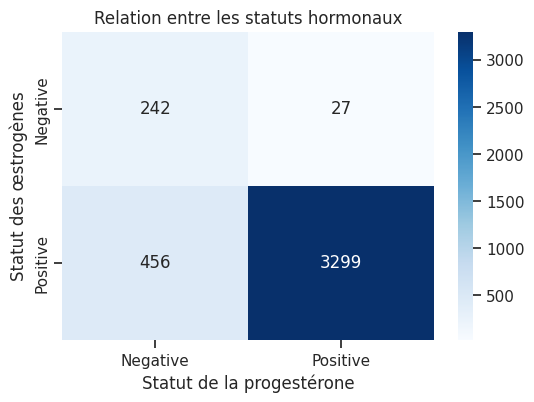

In [30]:
hormone_counts = data.groupby(["Estrogen Status", "Progesterone Status"]).size().unstack()

# Affichage de la heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(hormone_counts, annot=True, cmap="Blues", fmt="d")
plt.title("Relation entre les statuts hormonaux")
plt.xlabel("Statut de la progestérone")
plt.ylabel("Statut des œstrogènes")
plt.show()

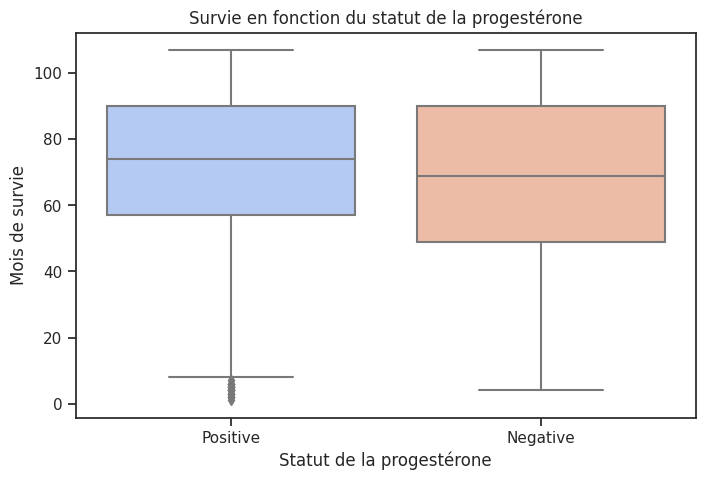

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Progesterone Status", y="Survival Months", data=data, palette="coolwarm")
plt.title("Survie en fonction du statut de la progestérone")
plt.xlabel("Statut de la progestérone")
plt.ylabel("Mois de survie")
plt.show()

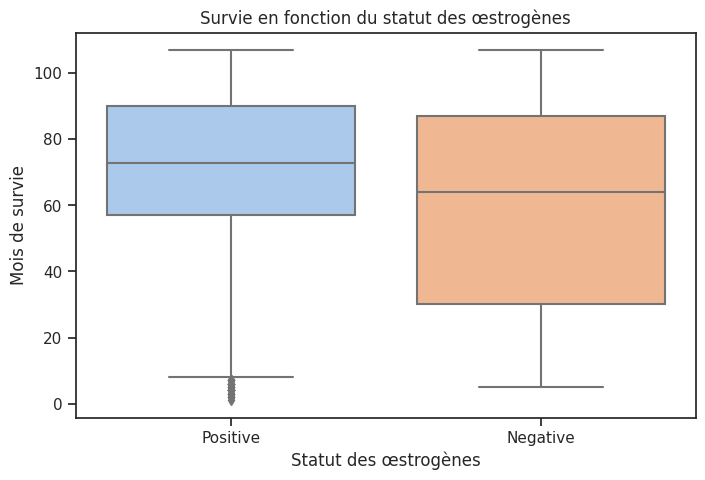

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Estrogen Status", y="Survival Months", data=data, palette="pastel")
plt.title("Survie en fonction du statut des œstrogènes")
plt.xlabel("Statut des œstrogènes")
plt.ylabel("Mois de survie")
plt.show()

In [33]:
data_test = data.copy()

In [34]:
data_test

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately differentiated     2  Regional          63        Positive   
3         Poorly differentiated     3  Regional          18        Positive   
4         Poorly differentiated     3  Regional          41        Positive   
...                         ...   ...       ...         ...             ...   
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0               Positive                      24                      1   
1               Positive                      14                      5   
2               Positive                      14                      7   
3               Positive                       2                      1   
4               Positive                       3                      1   
...                  ...                     ...                    ...   
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status  
0                  60  Alive  
1                  62  Alive  
2                  75  Alive  
3                  84  Alive  
4                  50  Alive  
...               ...    ...  
4019               49  Alive  
4020               69  Alive  
4021               69  Alive  
4022               72  Alive  
4023              100  Alive  

[4024 rows x 16 columns]

In [35]:
data_test['Age'].min()

30

In [36]:
data_test['Age'].max()

69

In [37]:
def compute_percentage_hormone_status(df, group_col, target_col):
    grouped = df.groupby(group_col)[target_col].value_counts(normalize=True).unstack() * 100
    return grouped.add_suffix(target_col+'_pct')

In [38]:
def compute_percentage(df, group_col, target_col):
    grouped = df.groupby(group_col)[target_col].value_counts(normalize=True).unstack() * 100
    return grouped.add_suffix('_pct')

In [39]:
data_test

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately differentiated     2  Regional          63        Positive   
3         Poorly differentiated     3  Regional          18        Positive   
4         Poorly differentiated     3  Regional          41        Positive   
...                         ...   ...       ...         ...             ...   
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0               Positive                      24                      1   
1               Positive                      14                      5   
2               Positive                      14                      7   
3               Positive                       2                      1   
4               Positive                       3                      1   
...                  ...                     ...                    ...   
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status  
0                  60  Alive  
1                  62  Alive  
2                  75  Alive  
3                  84  Alive  
4                  50  Alive  
...               ...    ...  
4019               49  Alive  
4020               69  Alive  
4021               69  Alive  
4022               72  Alive  
4023              100  Alive  

[4024 rows x 16 columns]

In [40]:
data_test['Age_Group'] = pd.cut(data['Age'], bins=range(30, 71, 10), right=False, 
                           labels=[f"{i}-{i+9}" for i in range(30, 70, 10)])

In [41]:
Race_pct = compute_percentage(data_test, 'Age_Group', 'Race')
Marital_Status_pct = compute_percentage(data_test, 'Age_Group', 'Marital Status')
Grade_pct = compute_percentage(data_test, 'Age_Group', 'Grade')
Estrogen_Status_pct = compute_percentage_hormone_status(data_test, 'Age_Group', 'Estrogen Status')
Progesterone_Status_pct = compute_percentage_hormone_status(data_test, 'Age_Group','Progesterone Status')
A_Stage_pct = compute_percentage(data_test, 'Age_Group', 'A Stage')
Status_pct = compute_percentage(data_test, 'Age_Group', 'Status')

In [42]:
Race_pct

Race       Black_pct  Other_pct  White_pct
Age_Group                                 
30-39      10.434783  14.782609  74.782609
40-49       8.629893   9.786477  81.583630
50-59       6.618705   6.690647  86.690647
60-69       6.093750   6.484375  87.421875

In [43]:
Marital_Status_pct

Marital Status  Divorced_pct  Married_pct  Separated_pct  Single _pct  \
Age_Group                                                               
30-39               6.521739    63.478261       0.869565    27.826087   
40-49              10.765125    69.217082       1.690391    17.259786   
50-59              13.165468    66.618705       1.223022    15.035971   
60-69              13.046875    61.953125       0.546875    11.562500   

Marital Status  Widowed_pct  
Age_Group                    
30-39              1.304348  
40-49              1.067616  
50-59              3.956835  
60-69             12.890625

In [44]:
Frames = [Race_pct, Marital_Status_pct, Grade_pct, Estrogen_Status_pct, Progesterone_Status_pct, A_Stage_pct, Status_pct]

In [45]:
df_final = pd.concat(Frames, axis=1)

In [46]:
df_final

Black_pct  Other_pct  White_pct  Divorced_pct  Married_pct  \
Age_Group                                                               
30-39      10.434783  14.782609  74.782609      6.521739    63.478261   
40-49       8.629893   9.786477  81.583630     10.765125    69.217082   
50-59       6.618705   6.690647  86.690647     13.165468    66.618705   
60-69       6.093750   6.484375  87.421875     13.046875    61.953125   

           Separated_pct  Single _pct  Widowed_pct   anaplastic; Grade IV_pct  \
Age_Group                                                                       
30-39           0.869565    27.826087     1.304348                   1.304348   
40-49           1.690391    17.259786     1.067616                   0.444840   
50-59           1.223022    15.035971     3.956835                   0.431655   
60-69           0.546875    11.562500    12.890625                   0.390625   

               1_pct      2_pct      3_pct  NegativeEstrogen Status_pct  \
Age_Group                                                                 
30-39       5.217391  52.173913  41.304348                    13.478261   
40-49      12.811388  54.982206  31.761566                     6.850534   
50-59      13.812950  60.215827  25.539568                     7.266187   
60-69      15.234375  60.625000  23.750000                     4.687500   

           PositiveEstrogen Status_pct  NegativeProgesterone Status_pct  \
Age_Group                                                                 
30-39                        86.521739                        20.000000   
40-49                        93.149466                        13.879004   
50-59                        92.733813                        20.215827   
60-69                        95.312500                        16.796875   

           PositiveProgesterone Status_pct  Distant_pct  Regional_pct  \
Age_Group                                                               
30-39                            80.000000     3.913043     96.086957   
40-49                            86.120996     2.846975     97.153025   
50-59                            79.784173     1.942446     98.057554   
60-69                            83.203125     1.875000     98.125000   

           Alive_pct   Dead_pct  
Age_Group                        
30-39      79.565217  20.434783  
40-49      87.900356  12.099644  
50-59      86.402878  13.597122  
60-69      80.937500  19.062500

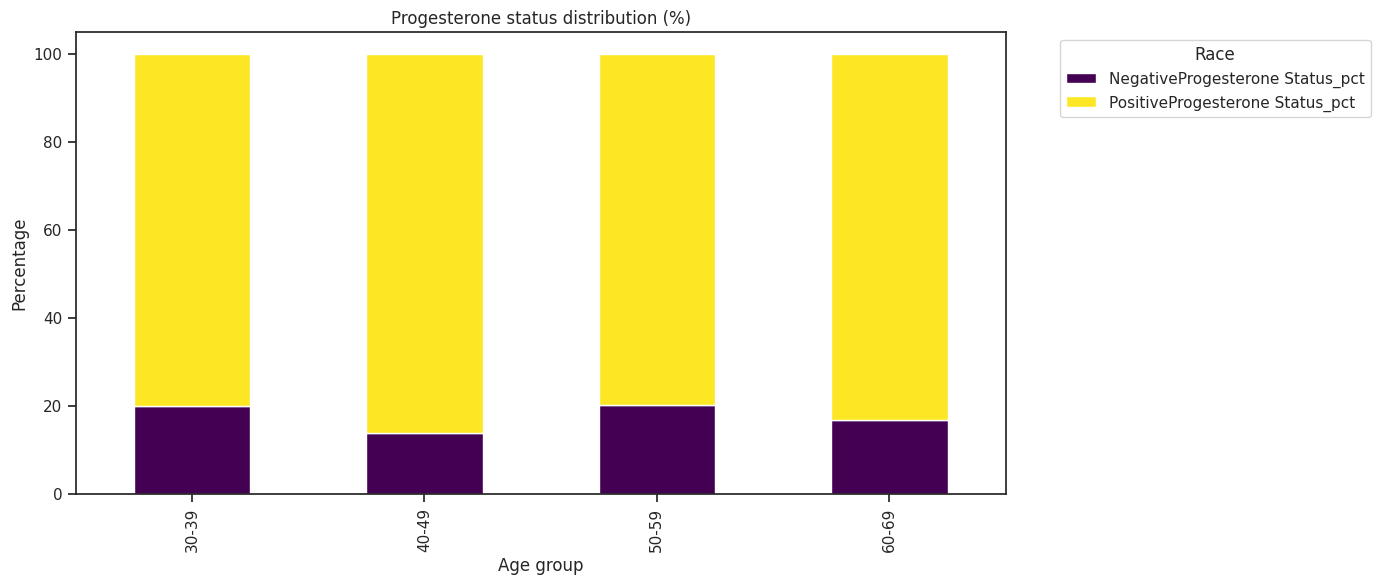

In [47]:
Progesterone_Status_pct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")

plt.title("Progesterone status distribution (%)")
plt.ylabel("Percentage")
plt.xlabel("Age group")
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

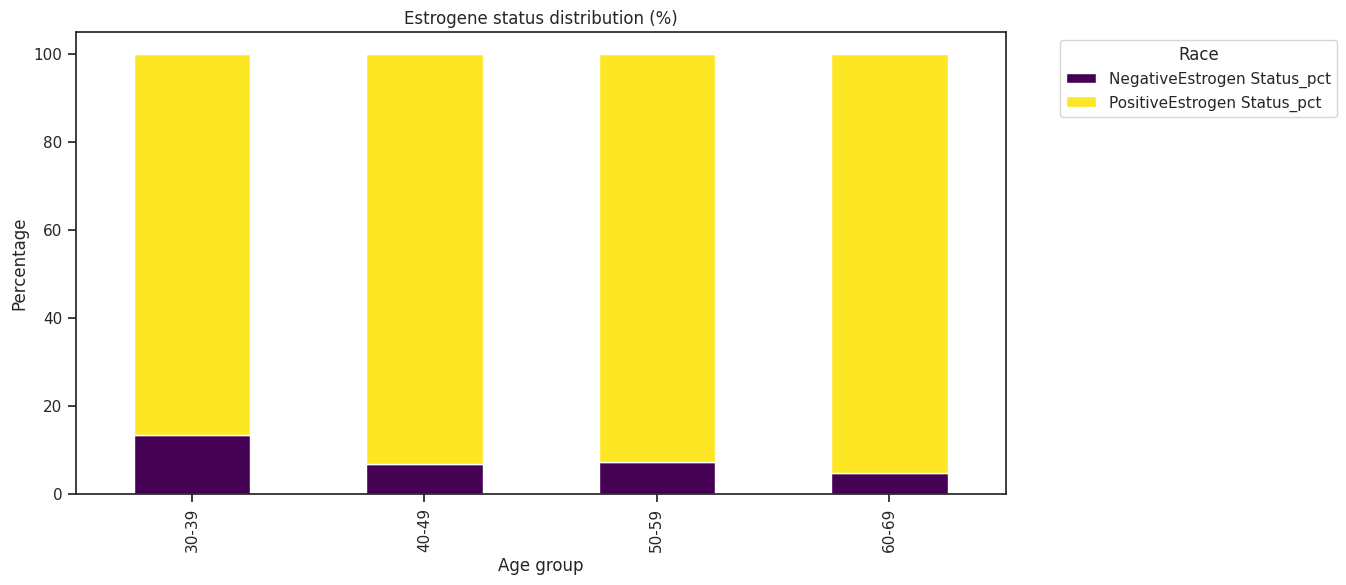

In [48]:
Estrogen_Status_pct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")

plt.title("Estrogene status distribution (%)")
plt.ylabel("Percentage")
plt.xlabel("Age group")
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

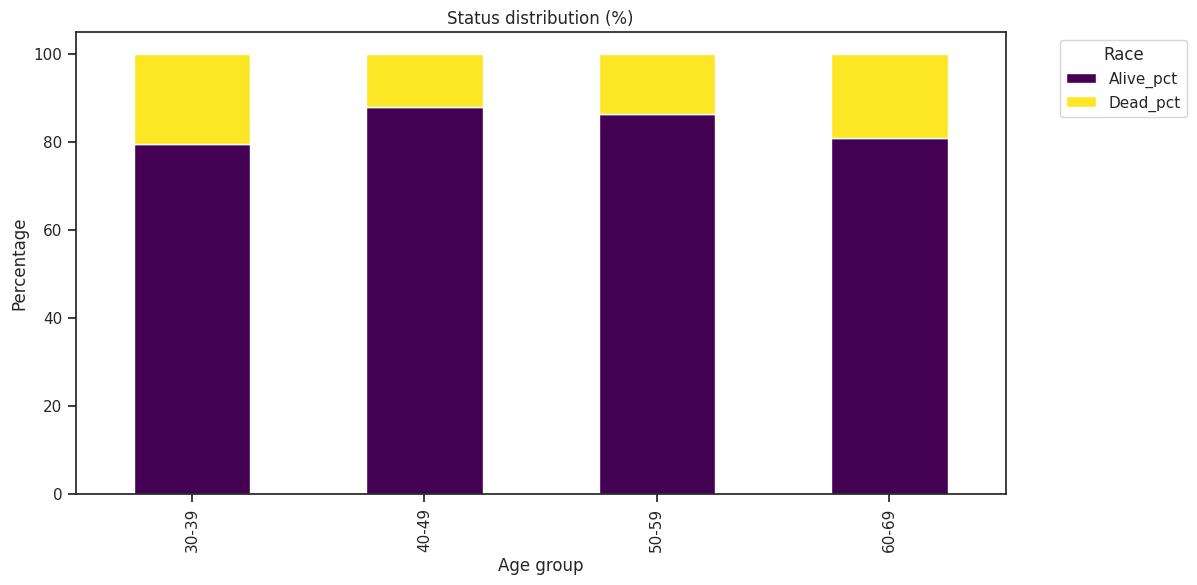

In [49]:
Status_pct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")

plt.title("Status distribution (%)")
plt.ylabel("Percentage")
plt.xlabel("Age group")
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [50]:
data_test.head()

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      14                      5   
2            Positive                      14                      7   
3            Positive                       2                      1   
4            Positive                       3                      1   

   Survival Months Status Age_Group  
0               60  Alive     60-69  
1               62  Alive     50-59  
2               75  Alive     50-59  
3               84  Alive     50-59  
4               50  Alive     40-49

In [51]:
test = data_test.groupby('Age_Group').mean()

In [52]:
test

Age  Tumor Size  Regional Node Examined  \
Age_Group                                                  
30-39      36.126087   35.439130               14.917391   
40-49      45.355872   32.294484               14.566726   
50-59      54.470504   29.740288               14.407194   
60-69      64.203906   28.778906               14.017969   

           Reginol Node Positive  Survival Months  
Age_Group                                          
30-39                   4.573913        67.152174  
40-49                   3.782028        72.712633  
50-59                   4.421583        71.502158  
60-69                   4.127344        70.578906

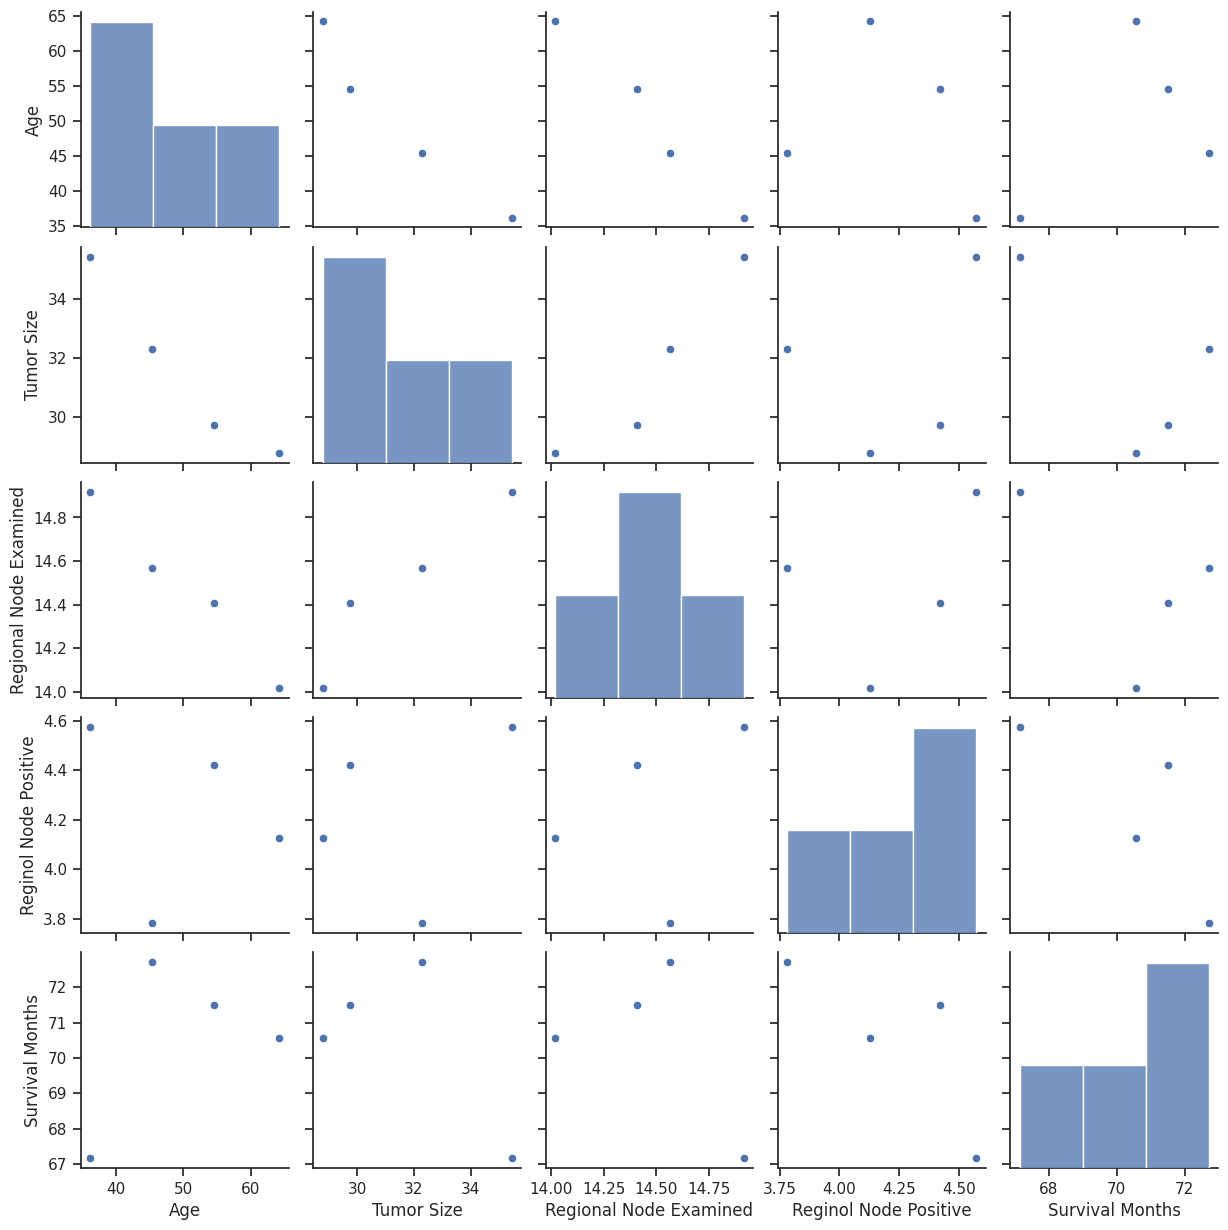

In [53]:
sns.pairplot(test)

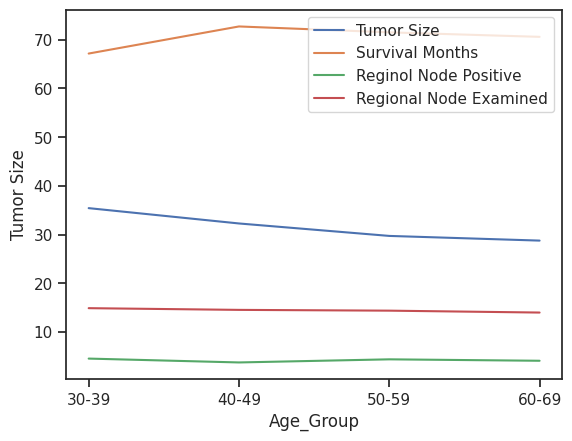

In [54]:
sns.lineplot(data=test, x = 'Age_Group', y= 'Tumor Size', label='Tumor Size')
sns.lineplot(data=test, x='Age_Group', y='Survival Months', label='Survival Months')
sns.lineplot(data=test, x='Age_Group', y='Reginol Node Positive', label='Reginol Node Positive')
sns.lineplot(data=test, x='Age_Group', y='Regional Node Examined', label='Regional Node Examined')

plt.legend()
plt.show()

In [56]:
light_blue = '#ADD8E6'  
light_orange = '#FFD580' 

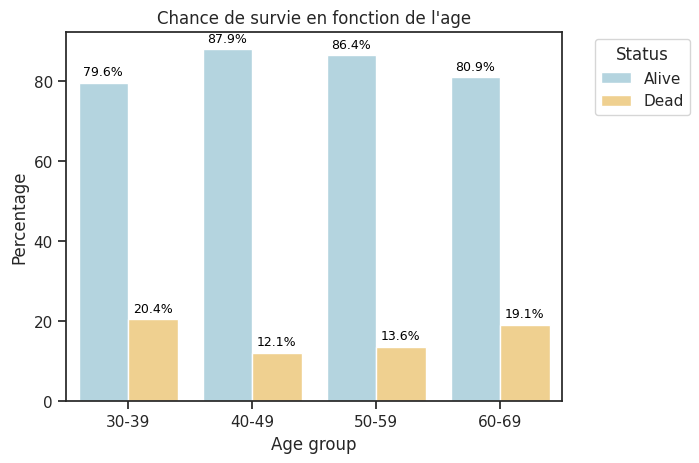

In [69]:
# Calculate percentages within each category for the 'Status' hue
category_counts = data_test.groupby(['Age_Group', 'Status']).size().reset_index(name='Count')
category_totals = category_counts.groupby('Age_Group')['Count'].transform('sum')
category_counts['Percentage'] = category_counts['Count'] / category_totals * 100

# Plot with percentages
sns.barplot(data=category_counts, x='Age_Group', y='Percentage', hue='Status', palette=[light_blue, light_orange])
ax = plt.gca()  
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=9, color='black', padding=3)
plt.title("Chance de survie en fonction de l'age")
plt.ylabel("Pourcentage")
plt.xlabel("Groupe d'age")
plt.legend(title="Status", bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

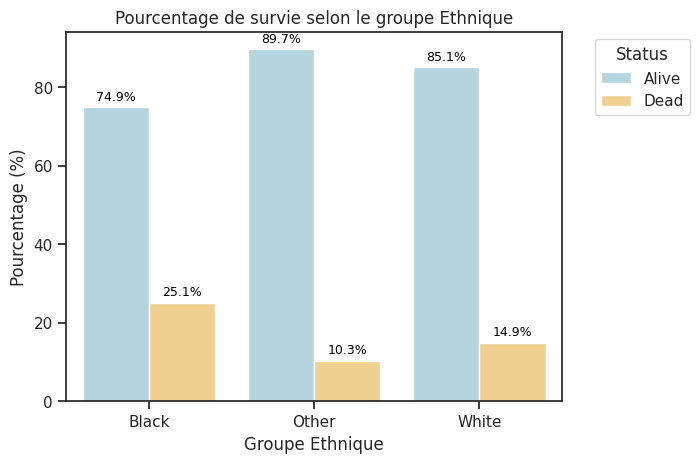

In [71]:
category_counts = data_test.groupby(['Race', 'Status']).size().reset_index(name='Count')
category_totals = category_counts.groupby('Race')['Count'].transform('sum')
category_counts['Percentage'] = category_counts['Count'] / category_totals * 100

# Plot with percentages
sns.barplot(data=category_counts, x='Race', y='Percentage', hue='Status', palette=[light_blue, light_orange])
ax = plt.gca()  
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=9, color='black', padding=3)
plt.title("Pourcentage de survie selon le groupe Ethnique")
plt.ylabel("Pourcentage (%)")
plt.xlabel("Groupe Ethnique")
plt.legend(title="Status", bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

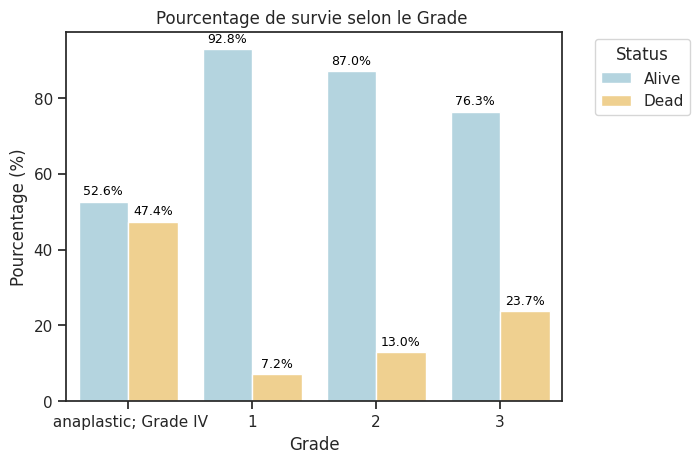

In [79]:
category_counts = data_test.groupby(['Grade', 'Status']).size().reset_index(name='Count')
category_totals = category_counts.groupby('Grade')['Count'].transform('sum')
category_counts['Percentage'] = category_counts['Count'] / category_totals * 100

# Plot with percentages
sns.barplot(data=category_counts, x='Grade', y='Percentage', hue='Status', palette=[light_blue, light_orange])
ax = plt.gca()  
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=9, color='black', padding=3)
plt.title("Pourcentage de survie selon le Grade ")
plt.ylabel("Pourcentage (%)")
plt.xlabel("Grade")
plt.legend(title="Status", bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

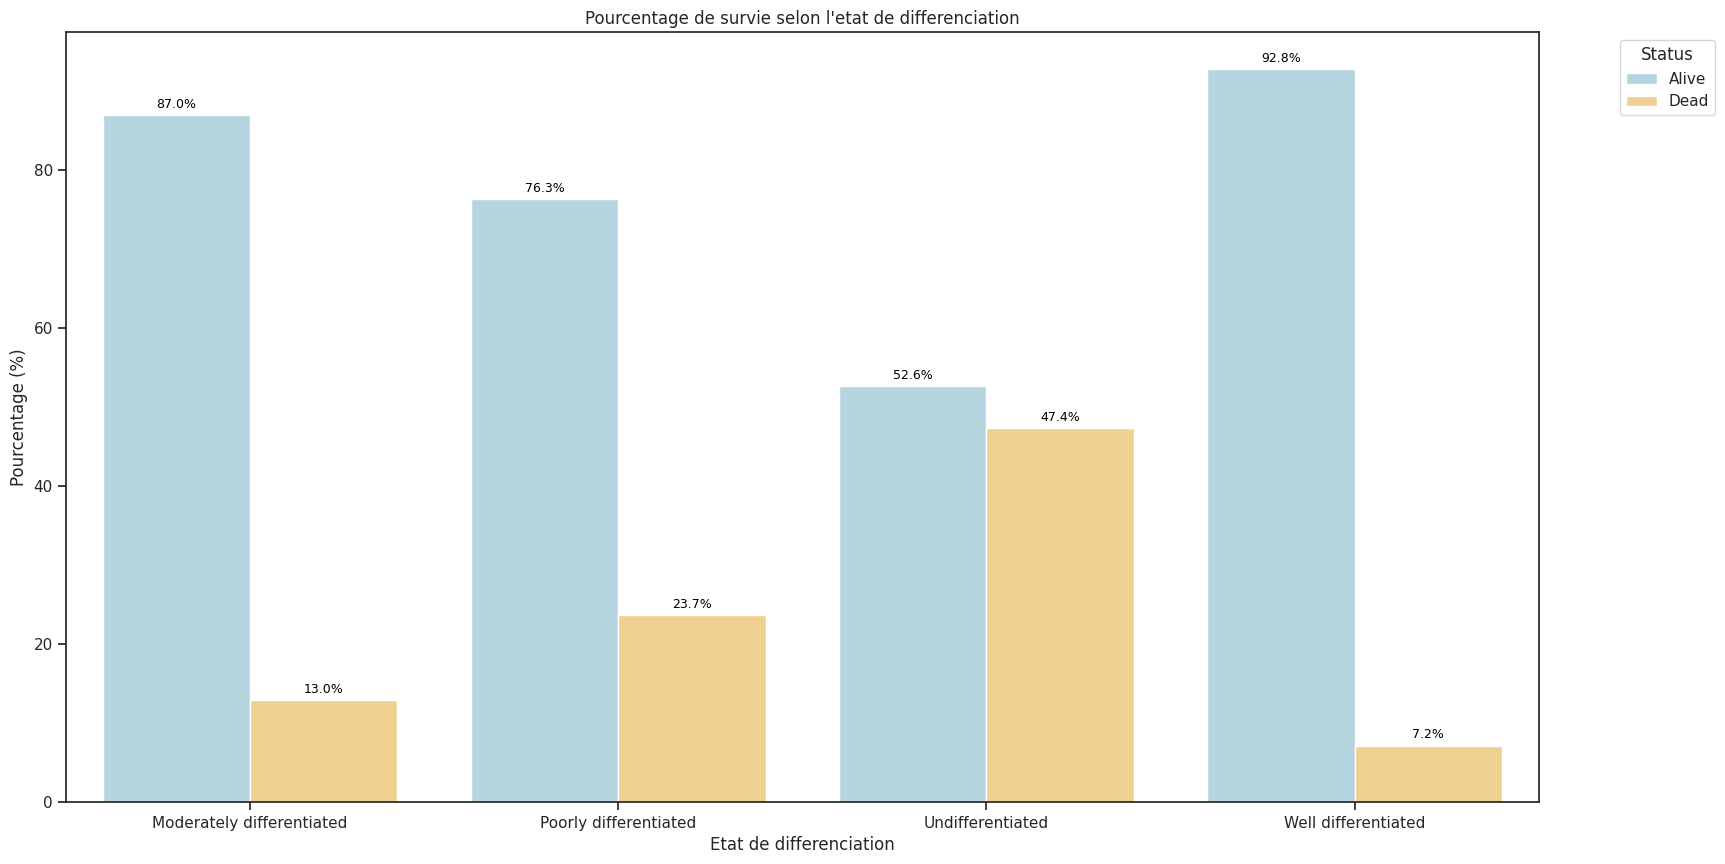

In [78]:
plt.figure(figsize=(19,10))
category_counts = data_test.groupby(['Age_Group', 'Status']).size().reset_index(name='Count')
category_totals = category_counts.groupby('differentiate')['Count'].transform('sum')
category_counts['Percentage'] = category_counts['Count'] / category_totals * 100

# Plot with percentages
sns.barplot(data=category_counts, x='differentiate', y='Percentage', hue='Status', palette=[light_blue, light_orange])
ax = plt.gca()  
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=9, color='black', padding=3)
plt.title("Pourcentage de survie selon l'etat de differenciation")
plt.ylabel("Pourcentage (%)")
plt.xlabel("Etat de differenciation")
plt.legend(title="Status", bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

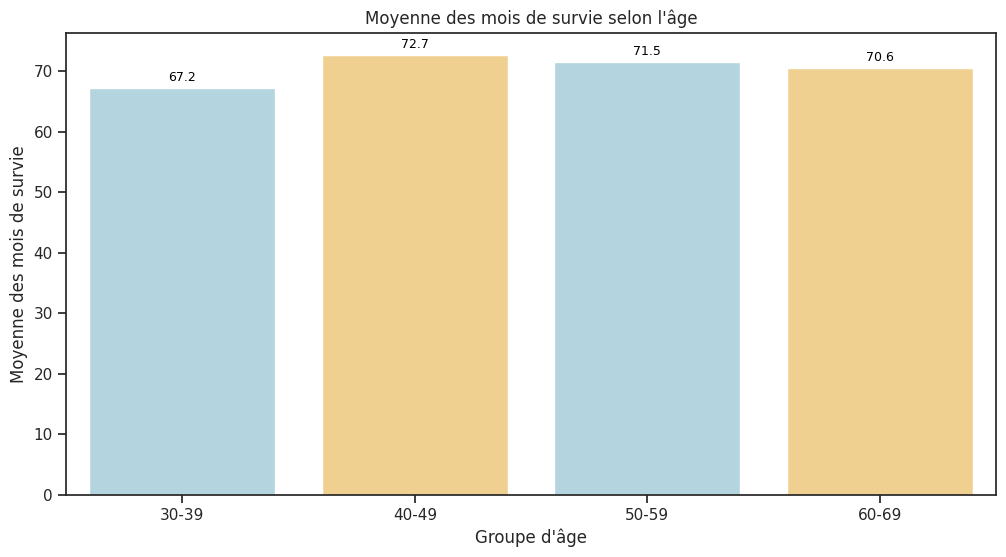

In [83]:
plt.figure(figsize=(12, 6))
category_counts = data_test.groupby('Age_Group')['Survival Months'].mean().reset_index()
sns.barplot(data=category_counts, x='Age_Group', y='Survival Months', palette=[light_blue, light_orange])

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=9, color='black', padding=3)

plt.title("Moyenne des mois de survie selon l'âge")
plt.ylabel("Moyenne des mois de survie")
plt.xlabel("Groupe d'âge")
plt.legend([],[], frameon=False)  

plt.show()

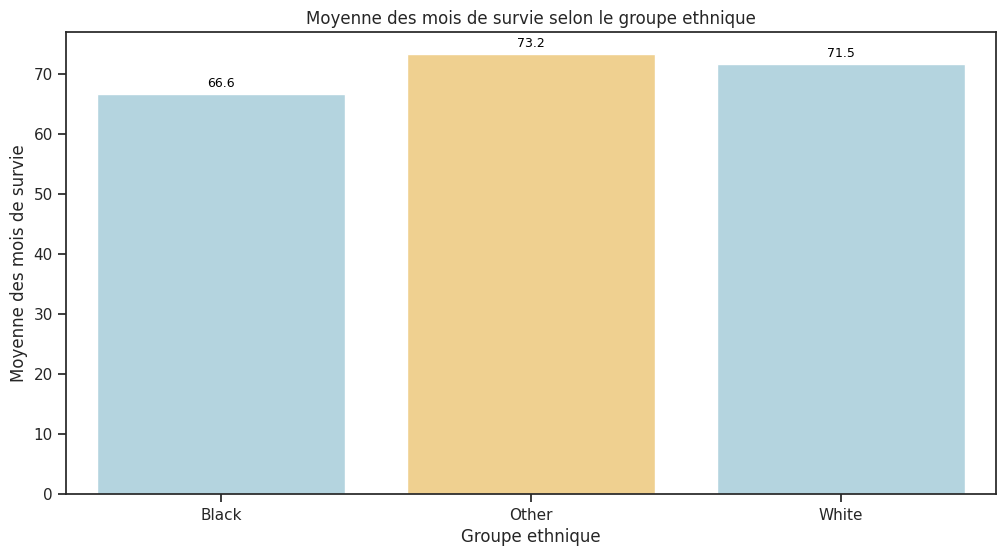

In [85]:
plt.figure(figsize=(12, 6))
category_counts = data_test.groupby('Race')['Survival Months'].mean().reset_index()
sns.barplot(data=category_counts, x='Race', y='Survival Months', palette=[light_blue, light_orange])

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=9, color='black', padding=3)

plt.title("Moyenne des mois de survie selon le groupe ethnique")
plt.ylabel("Moyenne des mois de survie")
plt.xlabel("Groupe ethnique")
plt.legend([],[], frameon=False) 

plt.show()

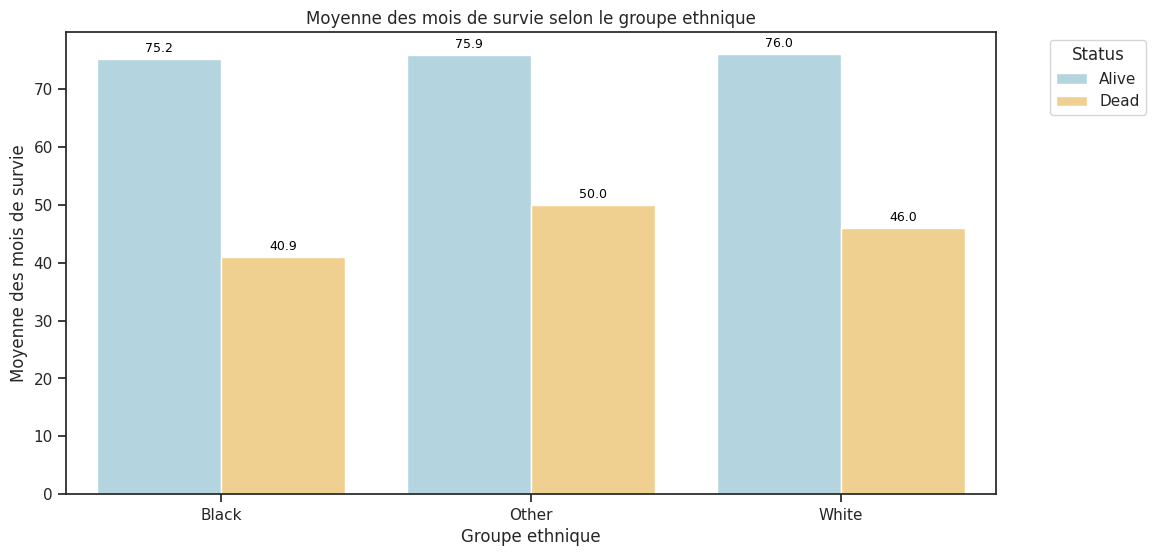

In [90]:
plt.figure(figsize=(12, 6))
category_counts = data_test.groupby(['Race', 'Status'])['Survival Months'].mean().reset_index()
sns.barplot(data=category_counts, x='Race', y='Survival Months', hue='Status', palette=[light_blue, light_orange])

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=9, color='black', padding=3)

plt.title("Moyenne des mois de survie selon le groupe ethnique")
plt.ylabel("Moyenne des mois de survie")
plt.xlabel("Groupe ethnique")
plt.legend(title="Status", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

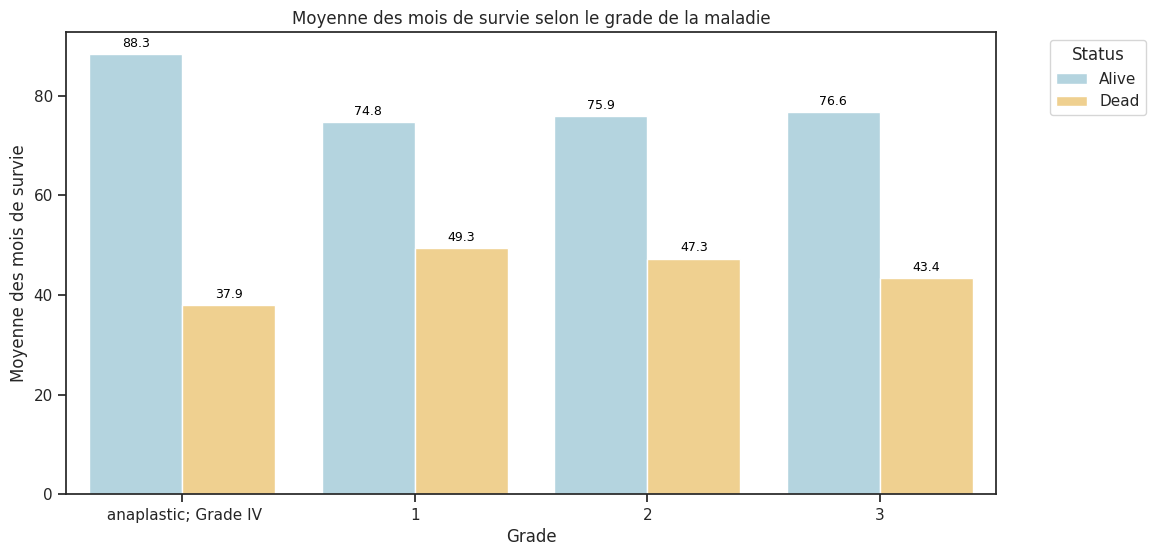

In [88]:
plt.figure(figsize=(12, 6))
category_counts = data_test.groupby(['Grade', 'Status'])['Survival Months'].mean().reset_index()
sns.barplot(data=category_counts, x='Grade', y='Survival Months', hue='Status', palette=[light_blue, light_orange])

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=9, color='black', padding=3)

plt.title("Moyenne des mois de survie selon le grade de la maladie")
plt.ylabel("Moyenne des mois de survie")
plt.xlabel("Grade")
plt.legend(title="Status", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [91]:
data_test

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately differentiated     2  Regional          63        Positive   
3         Poorly differentiated     3  Regional          18        Positive   
4         Poorly differentiated     3  Regional          41        Positive   
...                         ...   ...       ...         ...             ...   
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0               Positive                      24                      1   
1               Positive                      14                      5   
2               Positive                      14                      7   
3               Positive                       2                      1   
4               Positive                       3                      1   
...                  ...                     ...                    ...   
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status Age_Group  
0                  60  Alive     60-69  
1                  62  Alive     50-59  
2                  75  Alive     50-59  
3                  84  Alive     50-59  
4                  50  Alive     40-49  
...               ...    ...       ...  
4019               49  Alive     60-69  
4020               69  Alive     50-59  
4021               69  Alive     60-69  
4022               72  Alive     50-59  
4023              100  Alive     40-49  

[4024 rows x 17 columns]

In [93]:
data_test.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status', 'Age_Group'],
      dtype='object')

In [94]:
data_test['T Stage ']

0       T1
1       T2
2       T3
3       T1
4       T2
        ..
4019    T1
4020    T2
4021    T2
4022    T2
4023    T2
Name: T Stage , Length: 4024, dtype: object